In [ ]:
%matplotlib inline

In [1]:
import os
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/p22g5


In [2]:
os.chdir('AnomaliesRecycling')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/p22g5/AnomaliesRecycling



Transfer Learning
==============================================
Based on this [tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#load-data)


In [3]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import models, transforms
import matplotlib.pyplot as plt

import transfer_learning
from transfer_learning import TransferLearningTrainer


plt.ion()   # interactive mode

In [5]:
torch.cuda.is_available()
torch.cuda.current_device()
torch.cuda.device_count()

8

Load Data and Data Augmentation
---------

In [4]:

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),

        transforms.RandomHorizontalFlip(p=0.5),
        #transforms.RandomVerticalFlip(p=0.5),
        #transforms.RandomRotation(degrees=(0, 180)),
        #transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
        #transforms.RandomSolarize(threshold=0.5),
        #transforms.RandomAdjustSharpness(sharpness_factor=50, p=0.5),

        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:
batch_size = 32
transferLearningTrainer = TransferLearningTrainer(batch_size=batch_size
                                                  data_transforms=data_transforms,

)

Visualize a few images



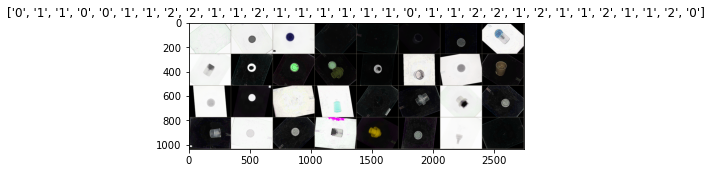

In [6]:
# Get a batch of training data
inputs, classes = next(iter(transferLearningTrainer.dataloaders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
transferLearningTrainer.imshow(out, [transferLearningTrainer.class_names[x] for x in classes])

Training the model
------------------

Finetuning the convnet
----------------------

Load a pretrained model and reset final fully connected layer.




In [8]:
model_name = "ResNet101"
model_ft = models.resnet101(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 6, since we have 6 classes
model_ft.fc = nn.Linear(num_ftrs, 6)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

 ***Train and evaluate***

In [10]:
model_ft = transferLearningTrainer.train_model(model_ft,
                                               criterion,
                                               optimizer_ft,
                                               exp_lr_scheduler,
                                               num_epochs=50,
                                               model_name=model_name)

Epoch 0/49
----------
train Loss: 0.8840 Acc: 0.6891
test Loss: 0.5433 Acc: 0.7931
trigger times: 0

Epoch 1/49
----------
train Loss: 0.4498 Acc: 0.8409
test Loss: 0.3803 Acc: 0.8730
trigger times: 0

Epoch 2/49
----------
train Loss: 0.3523 Acc: 0.8732
test Loss: 0.2945 Acc: 0.9020
trigger times: 0

Epoch 3/49
----------
train Loss: 0.3141 Acc: 0.8891
test Loss: 0.3015 Acc: 0.8947
trigger times: 0

Epoch 4/49
----------
train Loss: 0.2801 Acc: 0.8991
test Loss: 0.3316 Acc: 0.8802
Trigger Times: 1

Epoch 5/49
----------
train Loss: 0.2638 Acc: 0.9095
test Loss: 0.2445 Acc: 0.9147
trigger times: 0

Epoch 6/49
----------
train Loss: 0.2422 Acc: 0.9150
test Loss: 0.2329 Acc: 0.9183
trigger times: 0

Epoch 7/49
----------
train Loss: 0.2293 Acc: 0.9186
test Loss: 0.1977 Acc: 0.9310
trigger times: 0

Epoch 8/49
----------
train Loss: 0.2153 Acc: 0.9323
test Loss: 0.2088 Acc: 0.9419
trigger times: 0

Epoch 9/49
----------
train Loss: 0.2251 Acc: 0.9227
test Loss: 0.2305 Acc: 0.9201
Trigger 

i = 144
data/test/1/Anlerndaten (651).jpg


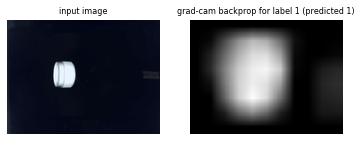

In [8]:
model_name = "ResNet18"
model_ft = models.resnet18()
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 6, since we have 6 classes
model_ft.fc = torch.nn.Linear(num_ftrs, 6)
model_ft.load_state_dict(torch.load("./models/" + model_name))
# print(model_ft)

transferLearningTrainer.print_cam(model_ft)

In [24]:
!reload_ext tensorboard
!tensorboard --logdir runs

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: reload_ext: command not found
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [11]:
model_name = "ResNet18"
model_ft = models.resnet18()
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 6, since we have 6 classes
model_ft.fc = nn.Linear(num_ftrs, 6)
model_ft.load_state_dict(torch.load("./models/"+model_name))
#visualize_model(model_ft, dataloaders, class_names)

<All keys matched successfully>

***Filenames where validation failed***

In [8]:
transferLearningTrainer.print_missclassified(model_ft)

/home/p22g5/anaconda3/envs/recycling/lib/python3.10/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


('data/test/0/Anlerndaten (622).jpg', 0)
must be 0, but predicted 1
('data/test/1/Anlerndaten (14).jpg', 1)
must be 1, but predicted 2


KeyboardInterrupt: 

/home/p22g5/anaconda3/envs/recycling/lib/python3.10/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


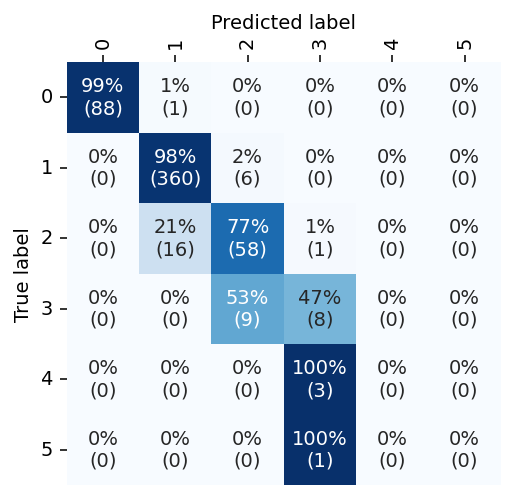

In [9]:
transferLearningTrainer.print_confusion_matrix(model_ft)

ConvNet as fixed feature extractor
----------------------------------

In [79]:
model_name = "ResNet18_freezed"
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 6)
criterion = nn.CrossEntropyLoss()
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Train and evaluate
^^^^^^^^^^^^^^^^^^

On CPU this will take about half the time compared to previous scenario.
This is expected as gradients don't need to be computed for most of the
network. However, forward does need to be computed.




In [81]:
model_conv = transferLearningTrainer.train_model(model_conv,
                                                 criterion,
                                                 optimizer_conv,
                                                 exp_lr_scheduler,
                                                 num_epochs=50,
                                                 model_name=model_name)

Epoch 0/49
----------
train Loss: 0.8307 Acc: 0.6977
test Loss: 0.5755 Acc: 0.7786

Epoch 1/49
----------
train Loss: 0.7038 Acc: 0.7482
test Loss: 0.8494 Acc: 0.6987

Epoch 2/49
----------
train Loss: 0.6470 Acc: 0.7691
test Loss: 0.4865 Acc: 0.8221

Epoch 3/49
----------
train Loss: 0.5775 Acc: 0.7886
test Loss: 0.4508 Acc: 0.8530

Epoch 4/49
----------
train Loss: 0.5704 Acc: 0.7818
test Loss: 0.6314 Acc: 0.7387

Epoch 5/49
----------
train Loss: 0.5340 Acc: 0.7982
test Loss: 0.4207 Acc: 0.8603

Epoch 6/49
----------
train Loss: 0.5195 Acc: 0.8041
test Loss: 0.4809 Acc: 0.8566

Epoch 7/49
----------
train Loss: 0.4549 Acc: 0.8300
test Loss: 0.4015 Acc: 0.8584

Epoch 8/49
----------
train Loss: 0.4685 Acc: 0.8314
test Loss: 0.3961 Acc: 0.8566

Epoch 9/49
----------
train Loss: 0.4585 Acc: 0.8350
test Loss: 0.4070 Acc: 0.8512

Epoch 10/49
----------
train Loss: 0.4460 Acc: 0.8364
test Loss: 0.4058 Acc: 0.8566

Epoch 11/49
----------
train Loss: 0.4324 Acc: 0.8482
test Loss: 0.3950 Acc

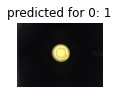

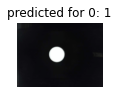

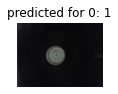

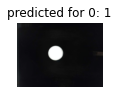

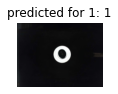

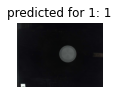

In [82]:
transferLearningTrainer.visualize_model(model_conv)